# Regression using the CART Algorithm (a decision tree regressor) and the Mean Squared Error Splitting Criterion
| Key              | Value                                                                                                                                                                                               |
|:-----------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Course Codes** | BBT 4106, BCM 3104, and BFS 4102                                                                                                                                                                    |
| **Course Names** | BBT 4106: Business Intelligence I (Week 10-12 of 13),<br/>BCM 3104: Business Intelligence and Data Analytics (Week 10-12 of 13) and<br/>BFS 4102: Advanced Business Data Analytics (Week 4-6 of 13) |
| **Semester**     | April to July 2025                                                                                                                                                                                  |
| **Lecturer**     | Allan Omondi                                                                                                                                                                                        |
| **Contact**      | aomondi@strathmore.edu                                                                                                                                                                              |
| **Note**         | The lecture contains both theory and practice. This notebook forms part of the practice. This is intended for educational purpose only.                                                             |

**Business context**: A restaurant called "Siwaka Dishes" has set a strategic objective *to optimize product profitability while maintaining customer satisfaction*. The business tracks two Key Performance Indicators (KPIs) from the financial perspective:

1. **Lagging KPI**: Monthly profit
2. **Leading KPI**: Profit per product category

The business wants to leverage Machine Learning as part of AI to create a predictive model that can forecast the profit per product for future sales. This will help in:
- Menu pricing optimization
- Inventory management
- Product mix decisions
- Cost control measures

The business would like the model to use the following historical data to predict the 'ProfitPerUnit'
- `PaymentDate`
- `CustomerType`
- `BranchSubCounty`
- `ProductCategoryName`
- `QuantityOrdered`

**Dataset**: The **Siwaka Dishes profit per product** dataset is a synthetic (not real) dataset that contains 17,474 payments for orders that are in either of the following states:
- Processing
- In Transit
- Delivered

'Pending orders' and 'Canceled' orders are excluded from the dataset. The following table presents the chosen features and the target.

| **Type**                                | **Name**                  | **Description**                                                          |
|:----------------------------------------|---------------------------|:-------------------------------------------------------------------------|
| **Feature**                             | `PaymentDate`             | The date when the payment was made                                       |
| <span style="color:red">Excluded</span> | `OrderNumber`             | The unique Order Number that the payment was made for                    |
| **Feature**                             | `CustomerType`            | Either a business or an individual                                       |
| <span style="color:red">Excluded</span> | `CustomerName`            | The name of the customer who made the order                              |
| **Feature**                             | `BranchSubCounty`         | The Sub-County where the branch is located                               |
| <span style="color:red">Excluded</span> | `BranchCounty`            | The County where the branch is located                                   |
| <span style="color:red">Excluded</span> | `ProductName`             | The name of the product that was purchased                               |
| **Feature**                             | `ProductCategoryName`     | The category in which the product was grouped in                         |
| **Feature**                             | `QuantityOrdered`         | The number of products ordered                                           |
| <span style="color:red">Excluded</span> | `CostOfProductionPerUnit` | The cost of producing the product                                        |
| <span style="color:red">Excluded</span> | `SellingPricePerUnit`     | The price at which the product was sold to the client                    |
| **Target**                              | `ProfitPerUnit`           | The amount of profit that the business made from the sale of the product |
| <span style="color:red">Excluded</span> | `PercentageProfitPerUnit` | The amount of profit the business made expressed as a percentage         |

## Step 1: Import the necessary libraries

**Purpose**: This chunk imports all the necessary libraries for data analysis, machine learning, and visualization.

1. **For data manipulation**
    - `pandas as pd`: For loading the dataset, creating and managing DataFrames, data manipulation and analysis using DataFrames
    - `numpy as np`: For numerical operations and array manipulations

2. **For Machine Learning**
    - `train_test_split`: Splits data into training and testing sets
    - `GridSearchCV`: For hyperparameter tuning using cross-validation
    - `StandardScaler`: For feature scaling
    - `KNeighborsClassifier`: For implementing the kNN algorithm
    - `classification_report, confusion_matrix`: For model evaluation metrics

3. **For statistical data analysis**
    - `kurtosis`: Measures the "tailedness" of data distribution
    - `skew`: Measures the asymmetry of data distribution

4. **For data visualization**
    - `matplotlib.pyplot as plt`: For basic plotting functionality
    - `seaborn as sns`: For enhanced statistical visualizations

5. **# For suppressing warnings**
    - `warnings`: Controls warning messages
    - `warnings.filterwarnings('ignore')`: Suppresses warning messages for cleaner output
    - Used to suppress warnings that may arise during the execution of the code. Even though it is not necessary for the code to run, it helps in keeping the output clean and focused on the results.

In [1]:
# For data manipulation
import pandas as pd
import numpy as np

# For Machine Learning
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

# For statistical data analysis
from scipy.stats import kurtosis
from scipy.stats import skew

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For suppressing warnings
import warnings
warnings.filterwarnings('ignore')

## Step 2: Load the data

**Purpose:** This chunk loads the dataset from a specified source (local file, Google Drive, or URL) into a Pandas DataFrame for further analysis.

1. **URL Configuration**
    - This specifies the location of the dataset to be loaded. You should **choose one** of the following options:
        - **From your computer**: Uncomment the line with the local path to load the dataset from your local machine.
        - **From your Google Drive using Google Colab**: Uncomment the lines to mount your Google Drive and specify the path to the dataset in your Google Drive.
        - **From a URL on GitHub**: This is the default choice. Uncomment the line with the URL to load the dataset directly from a GitHub repository.

2. **Data Loading Parameters**
    - Uses `pd.read_csv()` with specific parameters:
        - `usecols`: Loads only the columns specified in `use_cols` for memory efficiency
        - `encoding='utf-8'`: Handles special characters in the dataset. This is suitable for most languages and special characters like ñ, €, ®. Other alternative encodings include:
        - `encoding='utf-16'`: Supports multilingual characters, uses 2 Bytes per character.
        - `encoding='utf-32'`: Like utf-16 but uses 4 Bytes per character, suitable for full Unicode range.
        - `encoding='latin-1'`: Handles Western European characters (ISO-8859-1), such as ñ, ß, € without throwing decode errors.
        - `encoding='big5'`: Traditional Chinese encoding used in Taiwan and Hong Kong.
        - `encoding='shift_jis'`: Japanese character encoding used on Windows.
        - You can try different encodings if you encounter the `UnicodeDecodeError` while reading a file. This is useful in cases where the business has branches across different countries and the dataset contains characters from multiple languages.
        - `nrows=200000`: Limits the number of rows loaded to 200,000. This can be reduced or increased based on the available memory and the size of the dataset.
    - The data is then stored in a `Pandas` DataFrame for further analysis
    - This selective loading approach helps manage memory usage and focuses the analysis on the relevant features for the design of the model.



In [30]:
# Option 1: From your computer
# Uncomment the following line to load the data from your computer.
# url = './data/siwaka_dishes_view_profit_per_product.csv'

# Option 2: From your Google Drive using Google Colab:
# Uncomment the following lines to mount your Google Drive and load the data using Google Colab.

# from google.colab import drive
# drive.mount('/content/drive')
# url = '/content/drive/My Drive/Colab Notebooks/data/siwaka_dishes_view_profit_per_product.csv'

# Option 3: From a URL on GitHub
# Uncomment the following line to load the data from a URL on GitHub.
url = 'https://github.com/course-files/RegressionAndClassification/raw/refs/heads/main/data/siwaka_dishes_view_profit_per_product.csv'

use_cols = ['PaymentDate', 'OrderNumber', 'CustomerType', 'CustomerName', 'BranchSubCounty', 'BranchCounty', 'ProductName', 'ProductCategoryName', 'QuantityOrdered', 'CostOfProductionPerUnit', 'SellingPricePerUnit', 'ProfitPerUnit', 'PercentageProfitPerUnit']
profit_per_product = pd.read_csv(url, usecols=use_cols, encoding='utf-8', nrows=200000)

### Assign correct data types to the columns

In [31]:
# Convert PaymentDate column to a datetime data type
profit_per_product['PaymentDate'] = pd.to_datetime(profit_per_product['PaymentDate'])

## Step 3: Initial Exploratory Data Analysis (EDA)

In [32]:
print("\n*1* The number of observations and variables")
display(profit_per_product.shape)

print("\n*2* The data types:")
display(profit_per_product.info())

print("\n*3* The summary of the numeric columns:")
display(profit_per_product.describe())

print("\n*4* The whole dataset:")
display(profit_per_product)

print("\n*5* The first 5 rows in the dataset:")
display(profit_per_product.head())

print("\n*6* Percentage distribution for each category")
print("\nNumber of observations per class:")
print("Frequency counts:\n", profit_per_product['BranchCounty'].value_counts())
print("\nPercentages:\n", profit_per_product['BranchCounty'].value_counts(normalize=True) * 100, "%")


*1* The number of observations and variables


(17474, 13)


*2* The data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17474 entries, 0 to 17473
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   PaymentDate              17474 non-null  datetime64[ns]
 1   OrderNumber              17474 non-null  int64         
 2   CustomerType             17474 non-null  object        
 3   CustomerName             17474 non-null  object        
 4   BranchSubCounty          17474 non-null  object        
 5   BranchCounty             17474 non-null  object        
 6   ProductName              17474 non-null  object        
 7   ProductCategoryName      17474 non-null  object        
 8   QuantityOrdered          17474 non-null  int64         
 9   CostOfProductionPerUnit  17474 non-null  float64       
 10  SellingPricePerUnit      17474 non-null  float64       
 11  ProfitPerUnit            17474 non-null  float64       
 12  PercentageP

None


*3* The summary of the numeric columns:


,PaymentDate,OrderNumber,QuantityOrdered,CostOfProductionPerUnit,SellingPricePerUnit,ProfitPerUnit,PercentageProfitPerUnit
count,17474,17474.000000,17474.000000,17474.000000,17474.000000,17474.000000,17474.000000
mean,2024-04-17 08:24:35.105871360,2723.106558,4.493075,54.431441,112.923200,58.491759,126.954075
min,2021-01-10 00:00:00,1.000000,1.000000,5.000000,20.000000,10.000000,75.000000
25%,2023-09-14 00:00:00,1308.250000,2.000000,30.000000,60.000000,30.000000,100.000000
50%,2024-07-29 00:00:00,2729.000000,4.000000,30.000000,70.000000,40.000000,114.290000
75%,2025-02-10 00:00:00,4093.000000,6.000000,100.000000,200.000000,100.000000,133.330000
max,2025-05-30 00:00:00,5500.000000,8.000000,200.000000,400.000000,200.000000,300.000000
std,NaN,1598.405761,2.294737,45.505722,85.280394,40.104793,44.015305



*4* The whole dataset:


,PaymentDate,OrderNumber,CustomerType,CustomerName,BranchSubCounty,BranchCounty,ProductName,ProductCategoryName,QuantityOrdered,CostOfProductionPerUnit,SellingPricePerUnit,ProfitPerUnit,PercentageProfitPerUnit
0,2021-01-10,2132,Business,[Business] Severin Retreat,Makadara,Nairobi,Matoke na Sukuma,Soup/Stew Dishes,2,30.0,70.0,40.0,133.33
1,2021-01-10,2132,Business,[Business] Severin Retreat,Makadara,Nairobi,Vetkoek,Sweet Snacks/Desserts,4,20.0,50.0,30.0,150.00
2,2021-01-10,2132,Business,[Business] Severin Retreat,Makadara,Nairobi,Nyama na Matoke,Meat-Based Dishes,1,100.0,200.0,100.0,100.00
3,2021-01-17,2238,Business,[Business] Swahili Hotel,Kamukunji,Nairobi,Maharagwe na Wali,Legume-Based Dishes,1,30.0,60.0,30.0,100.00
4,2021-01-17,2238,Business,[Business] Swahili Hotel,Kamukunji,Nairobi,Shiro,African Cultural Specials,6,30.0,70.0,40.0,133.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17469,2025-05-30,5343,Business,[Business] Voyager Haven,Westlands,Nairobi,Supa ya Ndizi,Soup/Stew Dishes,5,30.0,70.0,40.0,133.33
17470,2025-05-30,5343,Business,[Business] Voyager Haven,Westlands,Nairobi,Egusi Soup,Combination Plates,3,40.0,80.0,40.0,100.00
17471,2025-05-30,5465,Business,[Business] Diani Inn,Ruaraka,Nairobi,Omena,Fish Dishes,4,30.0,70.0,40.0,133.33
17472,2025-05-30,5465,Business,[Business] Diani Inn,Ruaraka,Nairobi,Kaimati,Sweet Snacks/Desserts,4,5.0,20.0,15.0,300.00



*5* The first 5 rows in the dataset:


,PaymentDate,OrderNumber,CustomerType,CustomerName,BranchSubCounty,BranchCounty,ProductName,ProductCategoryName,QuantityOrdered,CostOfProductionPerUnit,SellingPricePerUnit,ProfitPerUnit,PercentageProfitPerUnit
0,2021-01-10,2132,Business,[Business] Severin Retreat,Makadara,Nairobi,Matoke na Sukuma,Soup/Stew Dishes,2,30.0,70.0,40.0,133.33
1,2021-01-10,2132,Business,[Business] Severin Retreat,Makadara,Nairobi,Vetkoek,Sweet Snacks/Desserts,4,20.0,50.0,30.0,150.00
2,2021-01-10,2132,Business,[Business] Severin Retreat,Makadara,Nairobi,Nyama na Matoke,Meat-Based Dishes,1,100.0,200.0,100.0,100.00
3,2021-01-17,2238,Business,[Business] Swahili Hotel,Kamukunji,Nairobi,Maharagwe na Wali,Legume-Based Dishes,1,30.0,60.0,30.0,100.00
4,2021-01-17,2238,Business,[Business] Swahili Hotel,Kamukunji,Nairobi,Shiro,African Cultural Specials,6,30.0,70.0,40.0,133.33



*6* Percentage distribution for each category

Number of observations per class:
Frequency counts:
 BranchCounty
Nairobi        13247
Kisumu           890
Mombasa          849
Nakuru           845
Uasin Gishu      826
Nyeri            817
Name: count, dtype: int64

Percentages:
 BranchCounty
Nairobi        75.809775
Kisumu          5.093281
Mombasa         4.858647
Nakuru          4.835756
Uasin Gishu     4.727023
Nyeri           4.675518
Name: proportion, dtype: float64 %


### Measures of Distribution

#### Variance of numeric columns

**Selection of numeric columns**
- The code selects columns with numeric data types (`int64` and `float64`) that can be subjected to mathematical or statistical functions.
- This is done using `select_dtypes()` method of the DataFrame, which filters columns based on their data types.

In [33]:
numeric_cols = profit_per_product.select_dtypes(include=['int64', 'float64']).columns
print("\nVariance of the numeric columns:")
print(profit_per_product[numeric_cols].var())


Variance of the numeric columns:
OrderNumber                2.554901e+06
QuantityOrdered            5.265819e+00
CostOfProductionPerUnit    2.070771e+03
SellingPricePerUnit        7.272746e+03
ProfitPerUnit              1.608394e+03
PercentageProfitPerUnit    1.937347e+03
dtype: float64


#### Standard deviation of numeric columns

In [34]:
print("\nStandard deviation of the numeric columns:")
print(profit_per_product[numeric_cols].std())


Standard deviation of the numeric columns:
OrderNumber                1598.405761
QuantityOrdered               2.294737
CostOfProductionPerUnit      45.505722
SellingPricePerUnit          85.280394
ProfitPerUnit                40.104793
PercentageProfitPerUnit      44.015305
dtype: float64


#### Kurtosis of numeric columns

In [7]:
print("\nFisher Kurtosis of numeric columns:")
print("\nInterpretation:")
print("→ Positive kurtosis indicates heavier tails (more outliers) than what is expected in a normal distribution - leptokurtic")
print("→ Negative kurtosis indicates lighter tails (less outliers) than what is expected in a normal distribution - platykurtic")
print("→ A normal distribution has kurtosis of 0 - mesokurtic")
print("\nKurtosis values:")
print(profit_per_product[numeric_cols].apply(lambda x: kurtosis(x, fisher=True)))


Fisher Kurtosis of numeric columns:

Interpretation:
→ Positive kurtosis indicates heavier tails (more outliers) than what is expected in a normal distribution - leptokurtic
→ Negative kurtosis indicates lighter tails (less outliers) than what is expected in a normal distribution - platykurtic
→ A normal distribution has kurtosis of 0 - mesokurtic

Kurtosis values:
OrderNumber               -1.215842
QuantityOrdered           -1.237126
CostOfProductionPerUnit    1.400854
SellingPricePerUnit        0.899802
ProfitPerUnit              0.694851
PercentageProfitPerUnit    6.882342
dtype: float64


#### Skewness of numeric columns

In [35]:
print("\nSkewness of numeric columns:")
print("\nInterpretation:")
print("→ Positive skewness indicates a long right tail (right-skewed distribution)")
print("→ Negative skewness indicates a long left tail (left-skewed distribution)")
print("→ Skewness close to 0 indicates a symmetric distribution")
print("\nSkewness values:")
print(profit_per_product[numeric_cols].apply(lambda x: skew(x)))


Skewness of numeric columns:

Interpretation:
→ Positive skewness indicates a long right tail (right-skewed distribution)
→ Negative skewness indicates a long left tail (left-skewed distribution)
→ Skewness close to 0 indicates a symmetric distribution

Skewness values:
OrderNumber                0.010793
QuantityOrdered            0.006793
CostOfProductionPerUnit    1.370163
SellingPricePerUnit        1.253998
ProfitPerUnit              1.172078
PercentageProfitPerUnit    2.497419
dtype: float64


### Measures of Relationship

#### Covariance matrix of numeric features

In [36]:
print("\nCovariance matrix of numeric features:")
print("\nInterpretation:")
print("→ Positive values indicate that variables move in the same direction")
print("→ Negative values indicate that variables move in opposite directions")
print("→ Values close to 0 indicate little to no linear relationship")
print("\nCovariance values:")
display(profit_per_product[numeric_cols].cov())


Covariance matrix of numeric features:

Interpretation:
→ Positive values indicate that variables move in the same direction
→ Negative values indicate that variables move in opposite directions
→ Values close to 0 indicate little to no linear relationship

Covariance values:


,OrderNumber,QuantityOrdered,CostOfProductionPerUnit,SellingPricePerUnit,ProfitPerUnit,PercentageProfitPerUnit
OrderNumber,2.554901e+06,-109.268306,986.696255,1852.453328,865.757073,-945.302315
QuantityOrdered,-1.092683e+02,5.265819,1.949219,3.476433,1.527214,0.116239
CostOfProductionPerUnit,9.866963e+02,1.949219,2070.770696,3867.560922,1796.790226,-1061.176327
SellingPricePerUnit,1.852453e+03,3.476433,3867.560922,7272.745547,3405.184624,-1931.511734
ProfitPerUnit,8.657571e+02,1.527214,1796.790226,3405.184624,1608.394398,-870.335407
PercentageProfitPerUnit,-9.453023e+02,0.116239,-1061.176327,-1931.511734,-870.335407,1937.347062


#### Correlation matrix of numeric features

In [37]:
print("\nSpearman's rank correlation matrix of numeric features:")
spearman_corr = profit_per_product[numeric_cols].corr(method='spearman')
print("\nInterpretation:")
print("→ Values range from -1 to +1")
print("→ +1 indicates perfect positive correlation")
print("→ -1 indicates perfect negative correlation")
print("→ 0 indicates no correlation")
print("\nCorrelation values:")
display(spearman_corr)


Spearman's rank correlation matrix of numeric features:

Interpretation:
→ Values range from -1 to +1
→ +1 indicates perfect positive correlation
→ -1 indicates perfect negative correlation
→ 0 indicates no correlation

Correlation values:


,OrderNumber,QuantityOrdered,CostOfProductionPerUnit,SellingPricePerUnit,ProfitPerUnit,PercentageProfitPerUnit
OrderNumber,1.000000,-0.029629,0.010602,0.007893,0.007016,-0.016741
QuantityOrdered,-0.029629,1.000000,0.016495,0.013839,0.011796,-0.015500
CostOfProductionPerUnit,0.010602,0.016495,1.000000,0.986725,0.966725,-0.758186
SellingPricePerUnit,0.007893,0.013839,0.986725,1.000000,0.992367,-0.668040
ProfitPerUnit,0.007016,0.011796,0.966725,0.992367,1.000000,-0.595540
PercentageProfitPerUnit,-0.016741,-0.015500,-0.758186,-0.668040,-0.595540,1.000000


### Basic visualization of the data

- `n_cols = 3` Sets the number of plots per row to 3
- `n_rows = (len(numeric_cols) // n_cols) + (1 if len(numeric_cols) % n_cols else 0)` Calculates the number of rows needed based on the number of numeric columns and the number of columns per row.
- `plt.figure(figsize=(12, 5 * n_rows))` Sets the figure size to be wider and taller based on the number of rows.
- `for i, col in enumerate(numeric_cols, 1):` Iterates over each numeric column (`numeric_cols`), starting the index at 1. `enumerate(numeric_cols, 1)` returns pairs of (index, value) for each item in the list. The 1 means that the index will start from 1, e.g., (1, 'Days for shipping (real)'), (2, 'Days for shipment (scheduled)'), etc.
- `plt.subplot(n_rows, n_cols, i)` Creates a subplot in a grid layout with `n_rows` rows and `n_cols` columns, placing the current plot in the `i`-th position.
- `sns.histplot(data=profit_per_product, x=col)` Plots a histogram for the current numeric column using Seaborn's `histplot` function.
- `sns.boxplot(data=profit_per_product, y=col)` Plots a box plot for the current numeric column using Seaborn's `boxplot` function.
- `sns.despine(right=True, top=True)` Removes the right and top spines (borders) of the plot for a cleaner look.
- `plt.title(f'Distribution of {col}')` Sets the title of the current subplot to indicate which column's distribution is being shown.
- `plt.grid(axis='y', alpha=0.2)` Adds a grid to the y-axis with a transparency level of 0.2 for better visibility.
- `plt.grid(axis='x', visible=False)` Hides the grid for the x-axis to reduce clutter and increase the data-to-ink ratio.
- `plt.tight_layout()` Adjusts the spacing between subplots to prevent overlap and ensure a clean layout.
- `plt.show()` Displays the entire figure with all subplots.

#### Histograms

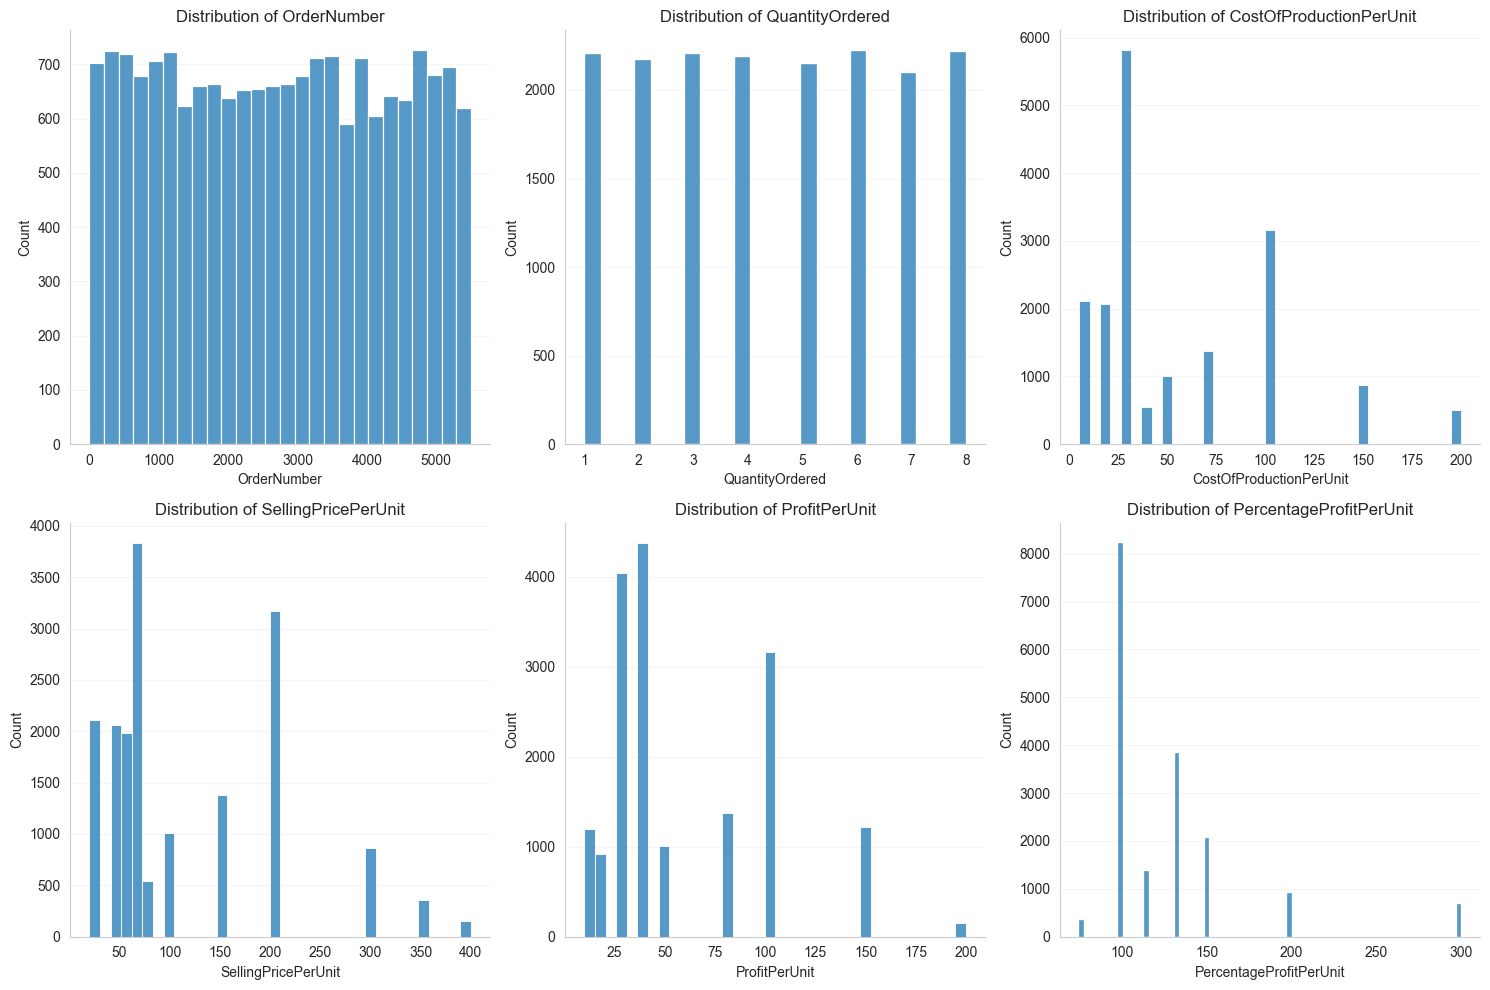

In [11]:
n_cols = 3
n_rows = (len(numeric_cols) // n_cols) + (1 if len(numeric_cols) % n_cols else 0)

plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=profit_per_product, x=col)
    sns.despine(right=True, top=True)
    plt.title(f'Distribution of {col}')
    plt.grid(axis='y', alpha=0.2)
    plt.grid(axis='x', visible=False)
plt.tight_layout()  # Adjust spacing
plt.show()

#### Box plots

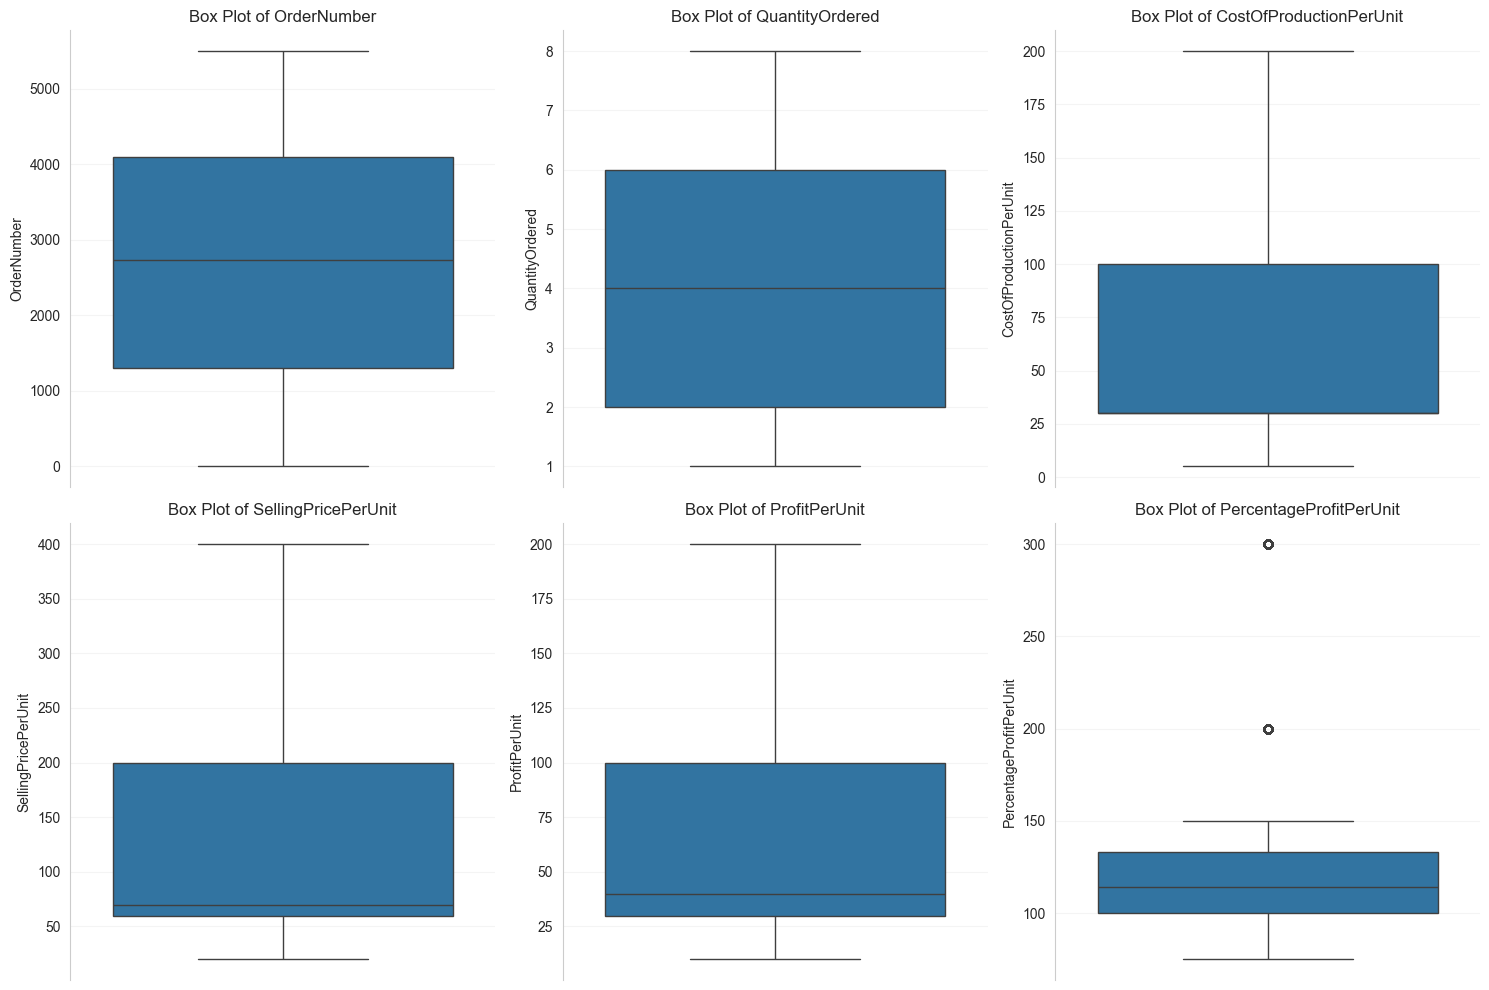

In [12]:
n_cols = 3
n_rows = (len(numeric_cols) // n_cols) + (1 if len(numeric_cols) % n_cols else 0)

plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=profit_per_product, y=col)
    sns.despine(right=True, top=True, bottom=True)
    plt.title(f'Box Plot of {col}')
    plt.grid(axis='y', alpha=0.2)
    plt.grid(axis='x', visible=False)
plt.tight_layout()
plt.show()

#### Missing data plot

- This visualization helps to quickly identify which columns have missing values and the extent of the missing data. The heatmap will show yellow for missing values and purple for present values, making it easy to spot patterns of missingness. This is useful for understanding the completeness of the dataset and deciding how to handle missing values in subsequent analysis.
- The code uses `Seaborn`'s `heatmap()` function to visualize missing data in the DataFrame.
- The code also uses the `isnull()` method to create a boolean DataFrame indicating where values are missing (True) or present (False).
- `yticklabels=False` hides the y-axis labels to reduce clutter and increase the data-to-ink ratio.
- `cbar=False` removes the color bar, which is not necessary for this plot.
- `cmap='viridis'` sets the color map to 'viridis' which is a perceptually uniform color map suitable for visualizing missing data; yellow represents missing values, while purple represents present values.
- `plt.title('Missing Data')` sets the title of the plot to 'Missing Data'
- `plt.show()` displays the plot.

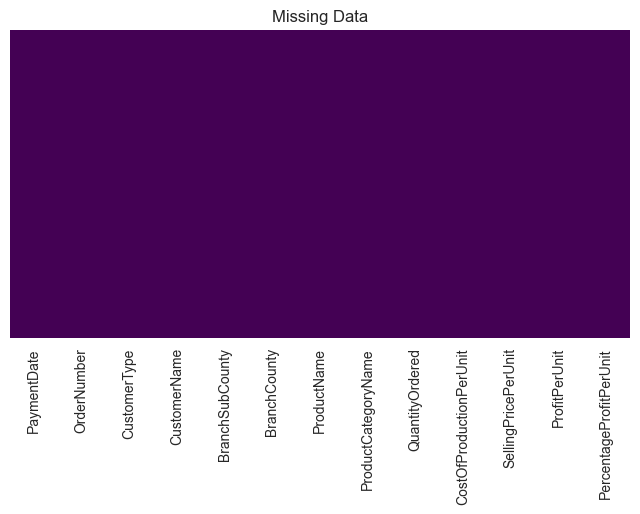

In [13]:
plt.figure(figsize=(8, 4))
sns.heatmap(profit_per_product.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data')
plt.show()

#### Correlation heatmap

- This visualization helps to quickly identify relationships between numeric features. The heatmap will show the strength and direction of correlations, with colors indicating positive (red) or negative (blue) correlations. This is useful for understanding how features relate to each other and can inform feature selection or feature engineering in subsequent analysis.
- The code uses `Searborn`'s `heatmap()` function to visualize the Spearman correlation matrix of the numeric features in the DataFrame.
- `annot=True` adds the correlation values as annotations on the heatmap.
- `cmap='coolwarm'` sets the color map to 'coolwarm' which provides a gradient from blue (negative correlation) to red (positive correlation).
- `center=0` centers the color map at 0, which is useful for visualizing both positive and negative correlations.

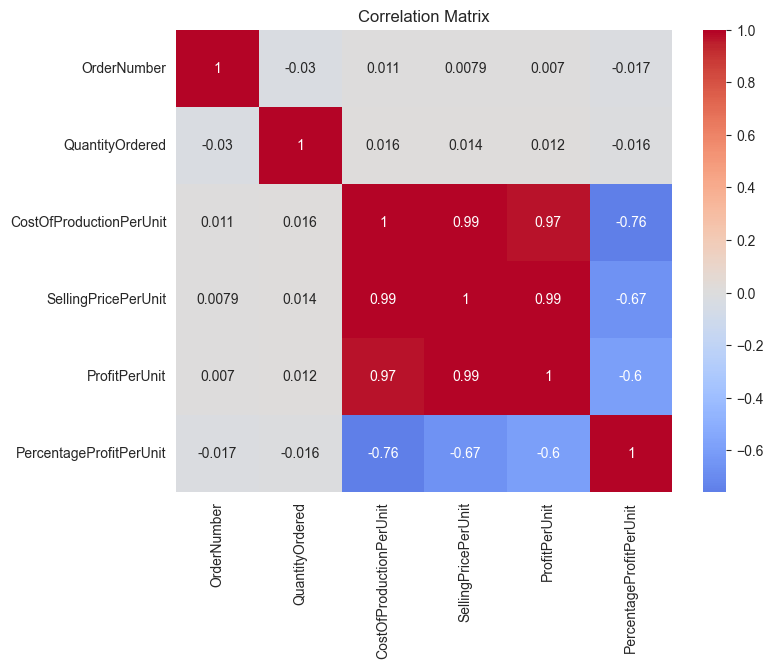

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

#### Scatter plot matrix

- This visualization helps to quickly identify relationships between pairs of numeric features. The scatter plot matrix will show scatter plots for each pair of numeric features, allowing for visual inspection of relationships, trends, and potential outliers. This is useful for understanding how features interact with each other and can inform feature selection or feature engineering in subsequent analysis.
- The code uses `Seaborn`'s `pairplot()` function to create a scatter plot matrix of the numeric features in the DataFrame
- `plt.suptitle('Scatter Plot Matrix', y=1.02)` Adds a centered title above all subplots (or the single plot). `y=1.02` Moves the title upward by 2% of the figure height (default is y=1.0). This is done to prevent overlap in the subplot titles.

<Figure size 1000x1000 with 0 Axes>

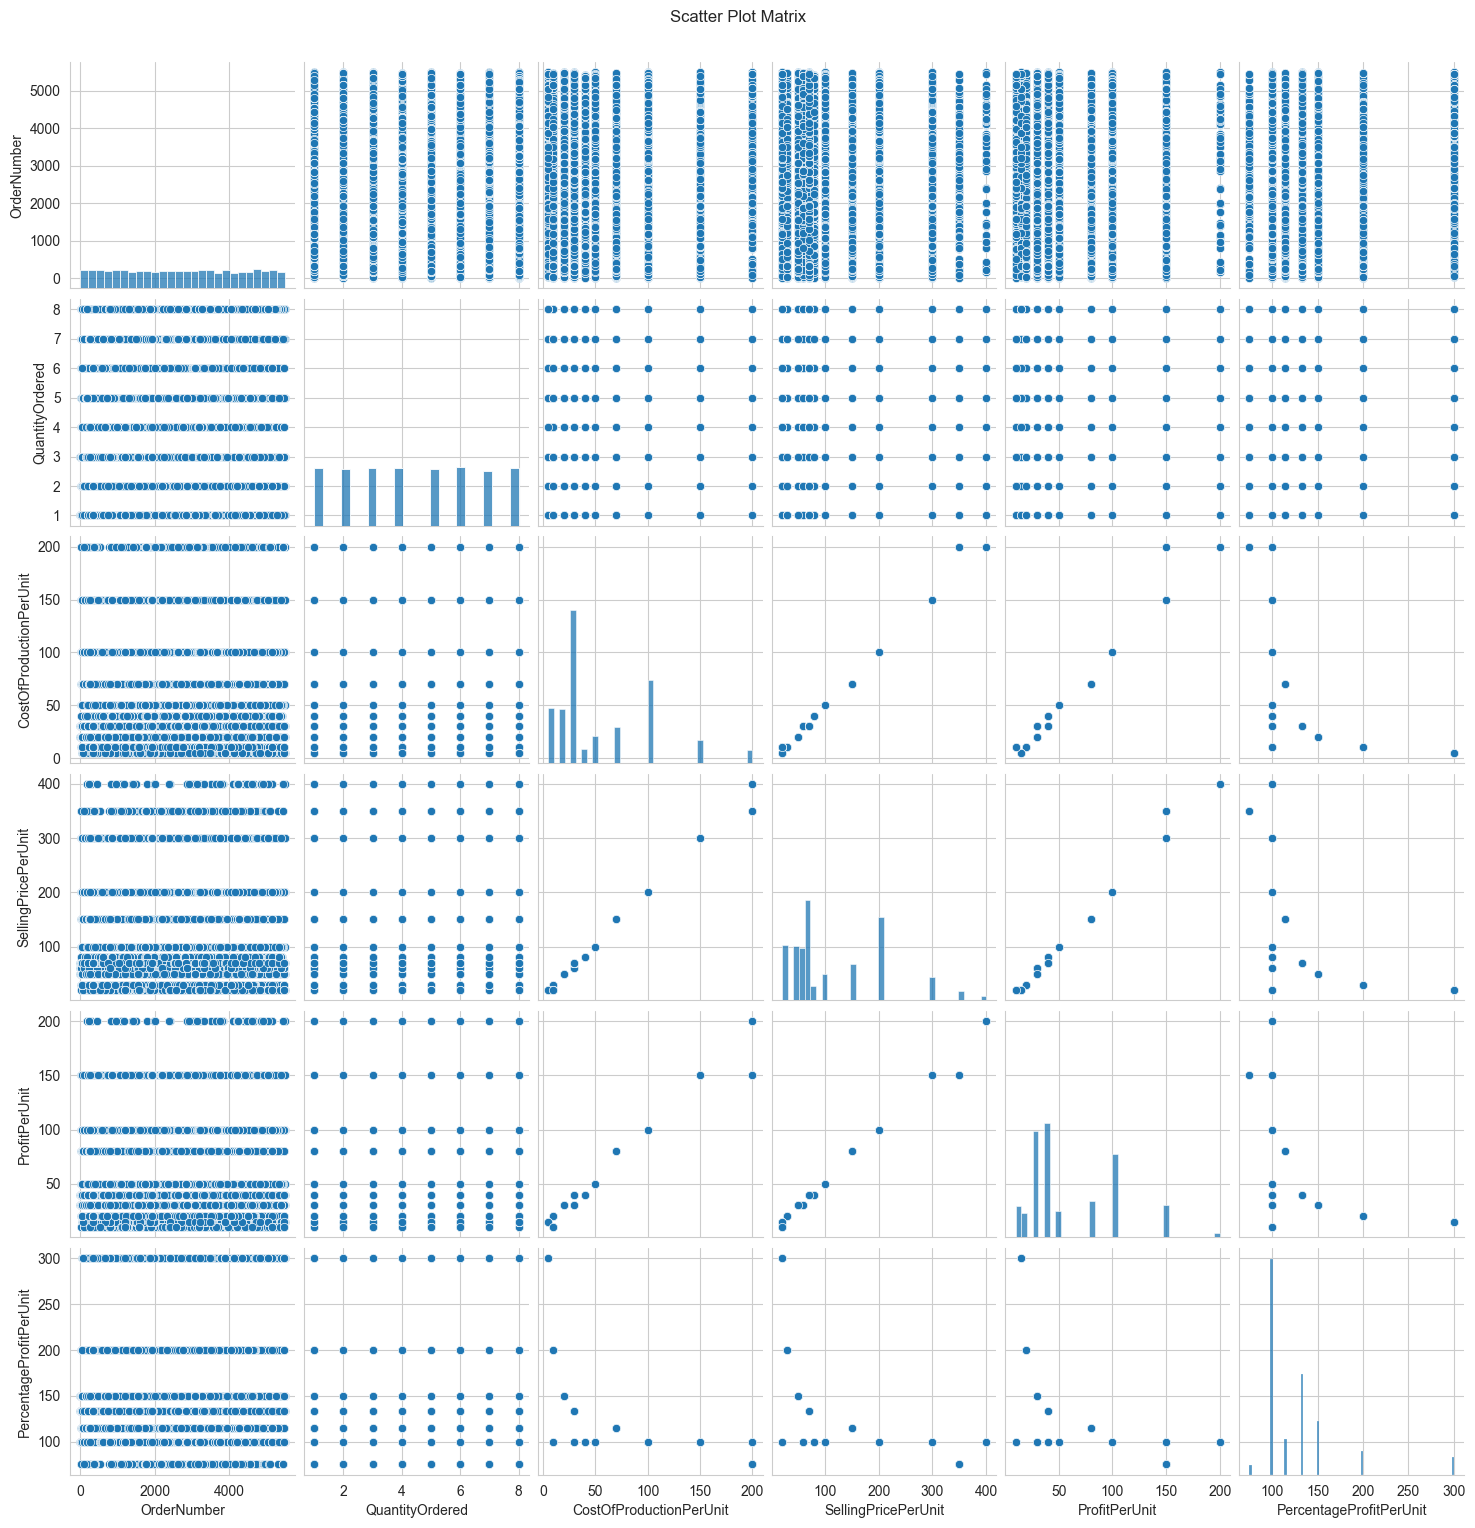

In [43]:
plt.figure(figsize=(10, 10))
sns.pairplot(profit_per_product[numeric_cols])
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

## Step 4: Data preparation

### One‑hot‑encode categorical variables

In [16]:
# This section is commented out because we are using label encoding for the 'Shipping Mode' variable.
# label encoding is better because it does not create additional columns for each category.

# profit_per_product_encoded = pd.get_dummies(X, drop_first=True)
# print('Encoded feature matrix shape:', profit_per_product_encoded.shape)

### Label‑encode categorical variables

In [17]:
from sklearn.preprocessing import LabelEncoder

# Get a list of categorical columns (those not in numeric_cols)
categorical_cols = profit_per_product.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]']).columns

# Create a copy of the dataframe for encoding
profit_per_product_encoded = profit_per_product.copy()

# Create a dictionary to store the label encoders for each column
label_encoders = {}

# Encode all categorical columns
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    profit_per_product_encoded[col] = label_encoders[col].fit_transform(profit_per_product[col])

In [18]:
profit_per_product_encoded.head()

,PaymentDate,OrderNumber,CustomerType,CustomerName,BranchSubCounty,BranchCounty,ProductName,ProductCategoryName,QuantityOrdered,CostOfProductionPerUnit,SellingPricePerUnit,ProfitPerUnit,PercentageProfitPerUnit
0,2021-01-10,2132,0,461,11,2,46,7,2,30.0,70.0,40.0,133.33
1,2021-01-10,2132,0,461,11,2,88,9,4,20.0,50.0,30.0,150.00
2,2021-01-10,2132,0,461,11,2,62,5,1,100.0,200.0,100.0,100.00
3,2021-01-17,2238,0,464,3,2,39,4,1,30.0,60.0,30.0,100.00
4,2021-01-17,2238,0,464,3,2,71,0,6,30.0,70.0,40.0,133.33


In [19]:
profit_per_product_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17474 entries, 0 to 17473
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   PaymentDate              17474 non-null  datetime64[ns]
 1   OrderNumber              17474 non-null  int64         
 2   CustomerType             17474 non-null  int64         
 3   CustomerName             17474 non-null  int64         
 4   BranchSubCounty          17474 non-null  int64         
 5   BranchCounty             17474 non-null  int64         
 6   ProductName              17474 non-null  int64         
 7   ProductCategoryName      17474 non-null  int64         
 8   QuantityOrdered          17474 non-null  int64         
 9   CostOfProductionPerUnit  17474 non-null  float64       
 10  SellingPricePerUnit      17474 non-null  float64       
 11  ProfitPerUnit            17474 non-null  float64       
 12  PercentageProfitPerUnit  17474 n

### Create X and y datasets for the features and target variable respectively

In [20]:
# First, identify datetime columns
datetime_columns = profit_per_product_encoded.select_dtypes(include=['datetime64']).columns

# Convert datetime to numeric features
for col in datetime_columns:
    profit_per_product_encoded[f'{col}_year'] = profit_per_product_encoded[col].dt.year
    profit_per_product_encoded[f'{col}_month'] = profit_per_product_encoded[col].dt.month
    profit_per_product_encoded[f'{col}_day'] = profit_per_product_encoded[col].dt.day
    profit_per_product_encoded[f'{col}_dayofweek'] = profit_per_product_encoded[col].dt.dayofweek

# Drop original datetime columns
profit_per_product_encoded = profit_per_product_encoded.drop(columns=datetime_columns)

profit_per_product_encoded.head(15)

,OrderNumber,CustomerType,CustomerName,BranchSubCounty,BranchCounty,ProductName,ProductCategoryName,QuantityOrdered,CostOfProductionPerUnit,SellingPricePerUnit,ProfitPerUnit,PercentageProfitPerUnit,PaymentDate_year,PaymentDate_month,PaymentDate_day,PaymentDate_dayofweek
0,2132,0,461,11,2,46,7,2,30.0,70.0,40.0,133.33,2021,1,10,6
1,2132,0,461,11,2,88,9,4,20.0,50.0,30.0,150.00,2021,1,10,6
2,2132,0,461,11,2,62,5,1,100.0,200.0,100.0,100.00,2021,1,10,6
3,2238,0,464,3,2,39,4,1,30.0,60.0,30.0,100.00,2021,1,17,6
4,2238,0,464,3,2,71,0,6,30.0,70.0,40.0,133.33,2021,1,17,6
5,1884,0,385,16,2,37,4,1,30.0,60.0,30.0,100.00,2021,2,5,4
6,1884,0,385,16,2,33,5,7,100.0,200.0,100.0,100.00,2021,2,5,4
7,1884,0,385,16,2,38,4,6,30.0,60.0,30.0,100.00,2021,2,5,4
8,152,1,68,7,2,80,7,6,70.0,150.0,80.0,114.29,2021,2,18,3
9,152,1,68,7,2,82,1,1,50.0,100.0,50.0,100.00,2021,2,18,3


In [21]:
X = profit_per_product_encoded.drop(['OrderNumber', 'CustomerName',
                                     'BranchCounty', 'ProductName', 'CostOfProductionPerUnit',
                                     'SellingPricePerUnit', 'ProfitPerUnit',
                                     'PercentageProfitPerUnit'], axis=1)
y = profit_per_product_encoded['ProfitPerUnit']

print("\nThe number of observations and variables in the features dataset")
print(X.shape)

print("\nThe number of observations and variables in the target dataset")
print(y.shape)


The number of observations and variables in the features dataset
(17474, 8)

The number of observations and variables in the target dataset
(17474,)


### Train‑test split

- This step splits the dataset into training and testing sets to evaluate the model's performance on unseen data. The `train_test_split()` function is used to randomly split the data.
- `test_size=0.3` indicates that 30% of the data will be used for testing, while 70% will be used for training.
- `random_state=53` ensures reproducibility of the split, meaning that every time you run the code, you will get the same split of data.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=53)

## Step 5: Create a baseline decision tree model

- This step creates a baseline decision tree regressor model using the `DecisionTreeRegressor` class from scikit-learn.
- The model is trained on the training data (`X_train` and `y_train`) to learn the relationship between the features and the target variable.
- The model is then used to make predictions on the test data (`X_test`).
- The performance of the model is evaluated using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²).
- MAE measures the average absolute difference between predicted and actual values.
- MSE measures the average squared difference between predicted and actual values.
- RMSE is the square root of MSE, providing an error metric in the same units as the target variable.
- R² indicates the proportion of variance in the target variable that is explained by the model, with values closer to 1 indicating a better fit.

---
- **R²** (also called the **coefficient of determination**), measures how well the model explains the variance in the target variable.
- It ranges typically from 0 to 1, where:
  - R² = 1: Perfect prediction
  - R² = 0: Model is no better than predicting the mean
  - R²<0: Model performs worse than predicting the mean

In [23]:
decisiontree_baseline_model = DecisionTreeRegressor(random_state=53)
decisiontree_baseline_model.fit(X_train, y_train)

y_pred = decisiontree_baseline_model.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print(f'MAE : {mae:,.2f}')
print(f'MSE : {mse:,.2f}')
print(f'RMSE: {rmse:,.2f}')
print(f'R²  : {r2:.4f}')

MAE : 17.83
MSE : 1,195.30
RMSE: 34.57
R²  : 0.2419


## Step 6: Perform hyperparameter tuning

In [24]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'friedman_mse']
}

grid = GridSearchCV(
    DecisionTreeRegressor(random_state=53),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

print('Best parameters:', grid.best_params_)
decisiontree_best_model = grid.best_estimator_

y_pred_best = decisiontree_best_model.predict(X_test)
mae_best  = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best   = r2_score(y_test, y_pred_best)

print(f'Optimised MAE : {mae_best:,.2f}')
print(f'Optimised MSE: {rmse_best:,.2f}')
print(f'Optimised RMSE: {rmse_best:,.2f}')
print(f'Optimised R²  : {r2_best:.4f}')

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Optimised MAE : 16.60
Optimised MSE: 25.05
Optimised RMSE: 25.05
Optimised R²  : 0.6020


## Step 7: Display the feature importance

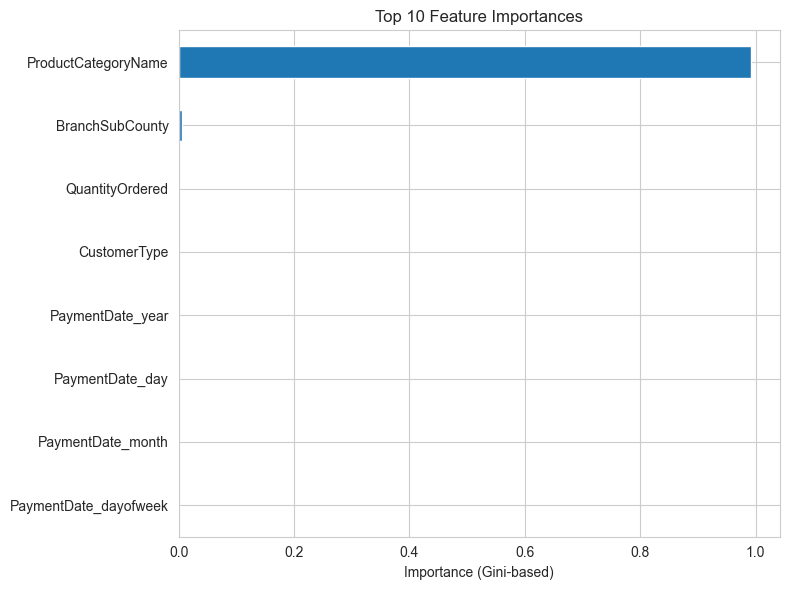

In [25]:
importances = pd.Series(decisiontree_best_model.feature_importances_, index=X.columns)
top_importances = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
top_importances.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance (Gini-based)')
plt.tight_layout()
plt.show()

## Step 8: Visualize the Decision Tree
Visualising the entire tree can be difficult when it is deep. For illustrative purposes, we can restrict it to a shallower depth.

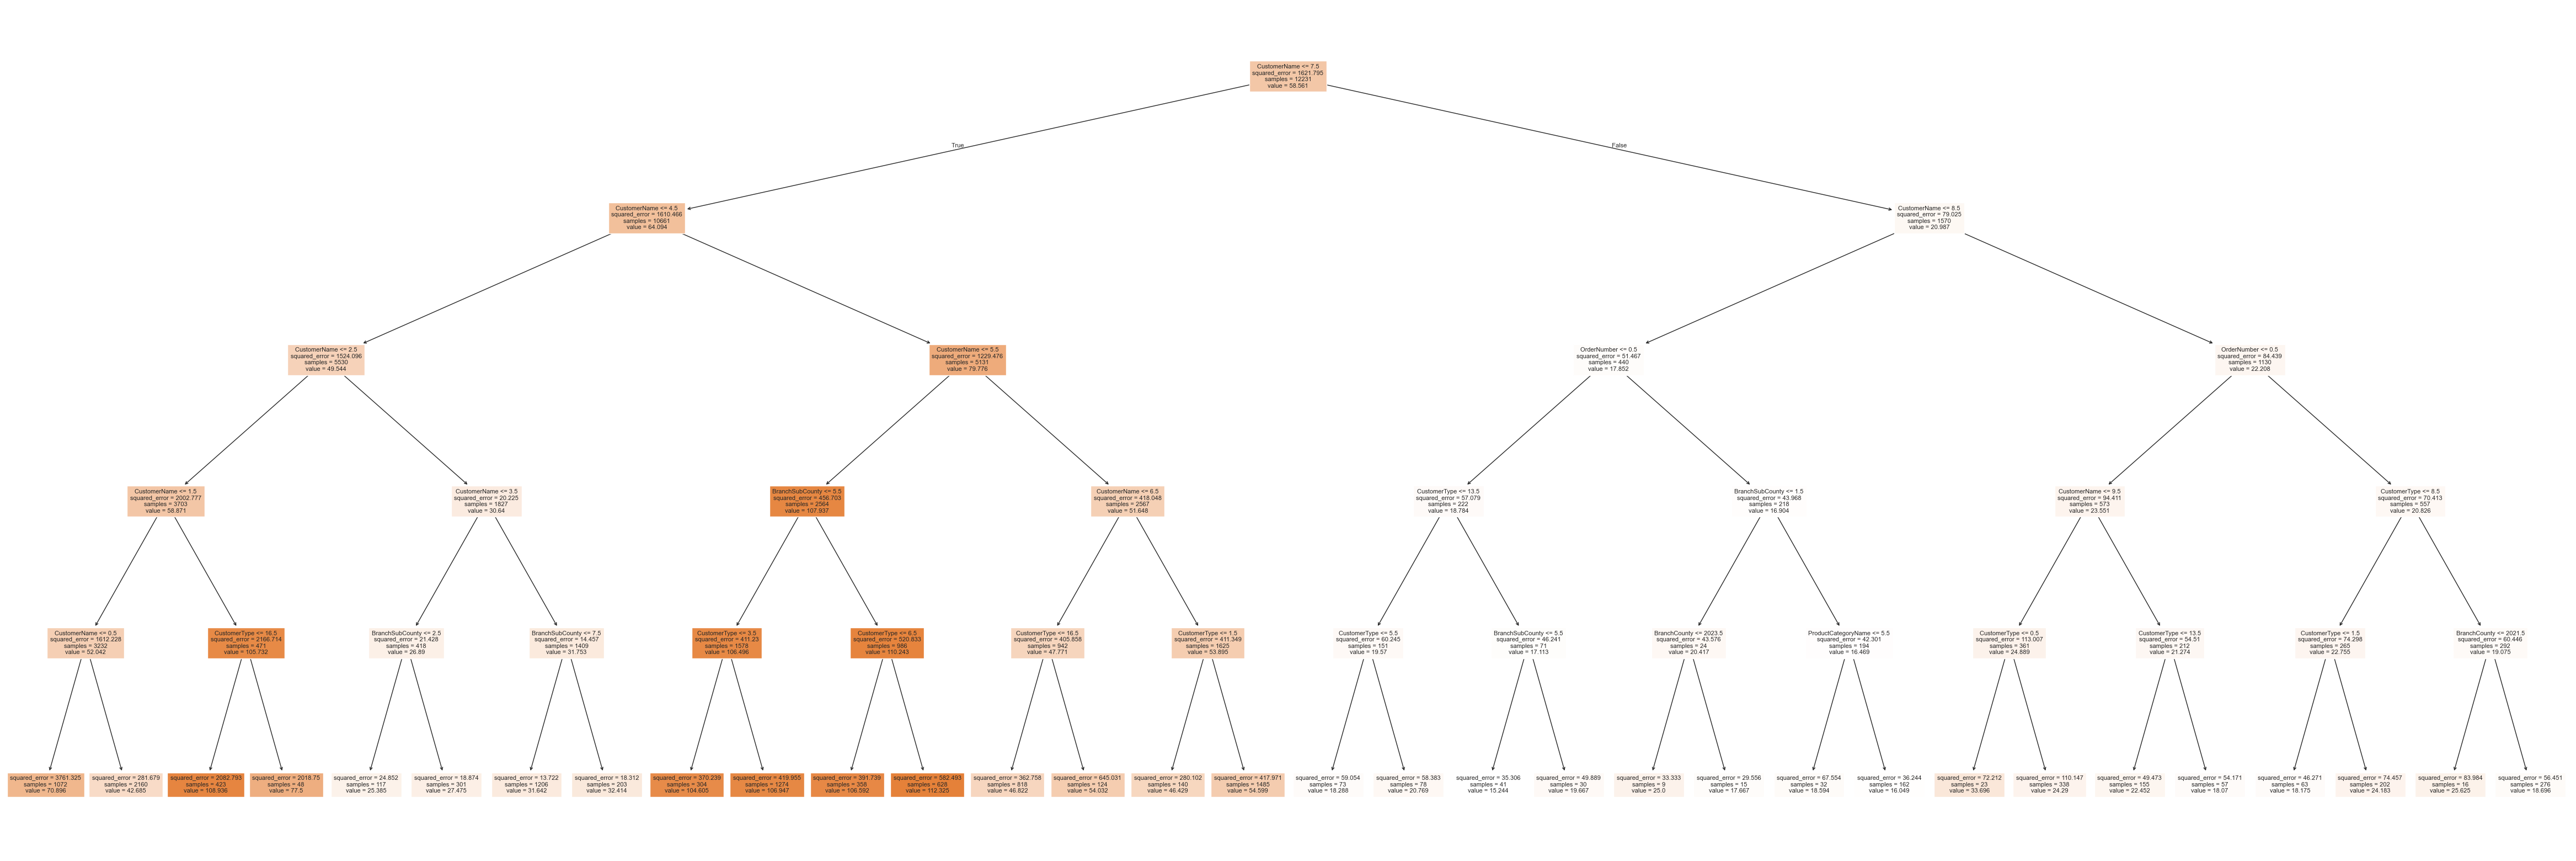

In [26]:
plt.figure(figsize=(60, 20))
plot_tree(decisiontree_best_model, feature_names=profit_per_product_encoded.columns, max_depth=5, filled=True, fontsize=8)
plt.show()

## Step 9: Make predictions on new data and save the results for reporting in Power BI

In [27]:
# Example: Using the trained model to make predictions on new or unseen data.
# Create a DataFrame with new customer data (replace values as needed)

new_data = pd.DataFrame({
    'PaymentDate': ['30-05-25'],
    'CustomerType': ['Business'],
    'BranchSubCounty': ['Kilimani'],
    'ProductCategoryName': ['Meat-Based Dishes'],
    'QuantityOrdered': [8]
})

# Convert PaymentDate column to datetime
new_data['PaymentDate'] = pd.to_datetime(new_data['PaymentDate'])

# First, identify datetime columns
datetime_columns = new_data.select_dtypes(include=['datetime64']).columns

# Convert datetime to numeric features
for col in datetime_columns:
    new_data[f'{col}_year'] = new_data[col].dt.year
    new_data[f'{col}_month'] = new_data[col].dt.month
    new_data[f'{col}_day'] = new_data[col].dt.day
    new_data[f'{col}_dayofweek'] = new_data[col].dt.dayofweek

# Drop original datetime columns
new_data = new_data.drop(columns=datetime_columns)

# Create a copy of the data for encoding
new_data_encoded = new_data.copy()

# Use transform() instead of fit_transform() since the encoder is already fitted
# Only transform new data using the fitted encoders
for col in categorical_cols:
    if col in new_data.columns:
        new_data_encoded[col] = label_encoders[col].transform(new_data[col])

# Make predictions
predictions = decisiontree_best_model.predict(new_data_encoded)

# Add predictions as a new column
new_data_encoded['Predicted_Order_Profit'] = predictions

display(new_data_encoded)


,CustomerType,BranchSubCounty,ProductCategoryName,QuantityOrdered,PaymentDate_year,PaymentDate_month,PaymentDate_day,PaymentDate_dayofweek,Predicted_Order_Profit
0,0,8,5,8,2025,5,30,4,112.324841


In [28]:
# Load new data from the URL
url = 'https://github.com/course-files/RegressionAndClassification/raw/refs/heads/main/data/siwaka_dishes_view_profit_per_product_new_data.csv'
new_data_all_cols = pd.read_csv(url, encoding='latin-1', nrows=200000)
new_data = pd.read_csv(url, usecols=use_cols, encoding='latin-1', nrows=200000)

# Create a copy for encoding
new_data_encoded = new_data.copy()

new_data_encoded = new_data_encoded.drop(['OrderNumber', 'CustomerName',
                                     'BranchCounty', 'ProductName', 'CostOfProductionPerUnit',
                                     'SellingPricePerUnit', 'ProfitPerUnit',
                                     'PercentageProfitPerUnit'], axis=1)

# Convert PaymentDate column to datetime
new_data_encoded['PaymentDate'] = pd.to_datetime(new_data_encoded['PaymentDate'])

# First, identify datetime columns
datetime_columns = new_data_encoded.select_dtypes(include=['datetime64']).columns

# Convert datetime to numeric features
for col in datetime_columns:
    new_data_encoded[f'{col}_year'] = new_data_encoded[col].dt.year
    new_data_encoded[f'{col}_month'] = new_data_encoded[col].dt.month
    new_data_encoded[f'{col}_day'] = new_data_encoded[col].dt.day
    new_data_encoded[f'{col}_dayofweek'] = new_data_encoded[col].dt.dayofweek

# Drop original datetime columns
new_data_encoded = new_data_encoded.drop(columns=datetime_columns)

# Get a list of categorical columns (those not in numeric_cols)
categorical_cols = new_data_encoded.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]']).columns

# Apply encoding to categorical columns using the fitted label encoders
for col in categorical_cols:
    if col in new_data.columns:
        new_data_encoded[col] = label_encoders[col].transform(new_data_encoded[col])

# Make predictions
predictions = decisiontree_best_model.predict(new_data_encoded)

# Add predictions to the original (non-encoded) data
new_data_all_cols['Predicted_Order_Profit'] = predictions

# Save the results to a CSV file in the data folder
new_data_all_cols.to_csv('./data/siwaka_dishes_siwaka_dishes_view_profit_per_product_predicted_data.csv', index=False)

# Display the first few rows of the results
print("First few rows of the data with predictions:")
display(new_data_all_cols.head(20))

First few rows of the data with predictions:


,PaymentDate,OrderNumber,CustomerType,CustomerName,BranchSubCounty,BranchCounty,ProductName,ProductCategoryName,QuantityOrdered,CostOfProductionPerUnit,SellingPricePerUnit,ProfitPerUnit,PercentageProfitPerUnit,Predicted_Order_Profit
0,2021-01-10,2132,Business,[Business] Severin Retreat,Makadara,Nairobi,Matoke na Sukuma,Soup/Stew Dishes,2,30.0,70.0,40.0,133.33,54.599327
1,2021-01-10,2132,Business,[Business] Severin Retreat,Makadara,Nairobi,Vetkoek,Sweet Snacks/Desserts,4,20.0,50.0,30.0,150.00,24.289941
2,2021-01-10,2132,Business,[Business] Severin Retreat,Makadara,Nairobi,Nyama na Matoke,Meat-Based Dishes,1,100.0,200.0,100.0,100.00,106.946625
3,2021-01-17,2238,Business,[Business] Swahili Hotel,Kamukunji,Nairobi,Maharagwe na Wali,Legume-Based Dishes,1,30.0,60.0,30.0,100.00,31.641791
4,2021-01-17,2238,Business,[Business] Swahili Hotel,Kamukunji,Nairobi,Shiro,African Cultural Specials,6,30.0,70.0,40.0,133.33,70.895522
5,2021-02-05,1884,Business,[Business] InterContinental Retreat,Roy Sambu,Nairobi,Maharagwe na Matoke,Legume-Based Dishes,1,30.0,60.0,30.0,100.00,31.641791
6,2021-02-05,1884,Business,[Business] InterContinental Retreat,Roy Sambu,Nairobi,Kuku na Wali,Meat-Based Dishes,7,100.0,200.0,100.0,100.00,112.324841
7,2021-02-05,1884,Business,[Business] InterContinental Retreat,Roy Sambu,Nairobi,Maharagwe na Sukuma,Legume-Based Dishes,6,30.0,60.0,30.0,100.00,31.641791
8,2021-02-18,152,Individual,Emmanuel Mugabe,Kibra,Nairobi,Supu ya Nyama na Wali,Soup/Stew Dishes,6,70.0,150.0,80.0,114.29,54.599327
9,2021-02-18,152,Individual,Emmanuel Mugabe,Kibra,Nairobi,Suya,Combination Plates,1,50.0,100.0,50.0,100.00,42.685185


## Business Insights
- A decision tree regressor can model non‑linear relationships and interactions without explicit feature engineering.
- Hyper‑parameter tuning and careful pruning are essential to avoid overfitting.
- Consider ensemble methods such as **Random Forest Regressor** or **Gradient Boosting** for improved generalisation.

Feel free to adapt this notebook, add additional preprocessing, or experiment with other models.